In [1]:
import numpy as np
import os
import pandas as pd
from pygformula import ParametricGformula
from pygformula.parametric_gformula.interventions import static
from pygformula.data import load_basicdata_nocomp
from IPython import get_ipython

### Toy example with real data

In [2]:
data = pd.read_csv('included_cohort_sample_prep.csv')

In [3]:
data = pd.read_csv('included_cohort_sample_prep.csv')

In [4]:
data.drop(['Unnamed: 0'], inplace=True, axis=1)

In [5]:
data = data.sample(frac=0.1, random_state=1).copy()

In [6]:
len(data)

37495

In [7]:
data.columns

Index(['NIA', 'sexe', 'data_naixement', 'abs_c', 'abs', 'pais_c',
       'N_vaccine_total', 'VACUNA_1_DATA', 'VACUNA_1_MOTIU', 'VACUNA_2_DATA',
       'VACUNA_2_MOTIU', 'VACUNA_3_DATA', 'VACUNA_3_MOTIU', 'VACUNA_1_DATA_pp',
       'VACUNA_2_DATA_pp', 'VACUNA_3_DATA_pp', 'DATA_DM_min', 'DM',
       'covid_bef_vax', 'test_date_covid_1', 'test_res_covid_1',
       'test_date_covid_2', 'test_res_covid_2', 'test_date_covid_3',
       'test_res_covid_3', 'test_date_imc_1', 'test_res_imc_1',
       'test_date_imc_2', 'test_res_imc_2', 'test_date_imc_3',
       'test_res_imc_3', 'test_date_sp_1', 'test_res_sp_1', 'test_date_sp_2',
       'test_res_sp_2', 'test_date_sp_3', 'test_res_sp_3', 'test_date_dp_1',
       'test_res_dp_1', 'test_date_dp_2', 'test_res_dp_2', 'test_date_dp_3',
       'test_res_dp_3', 'test_date_abdo_1', 'test_res_abdo_1',
       'test_date_abdo_2', 'test_res_abdo_2', 'test_date_abdo_3',
       'test_res_abdo_3', 'test_date_bg_1', 'test_res_bg_1', 'test_date_bg_2',
       

<Axes: >

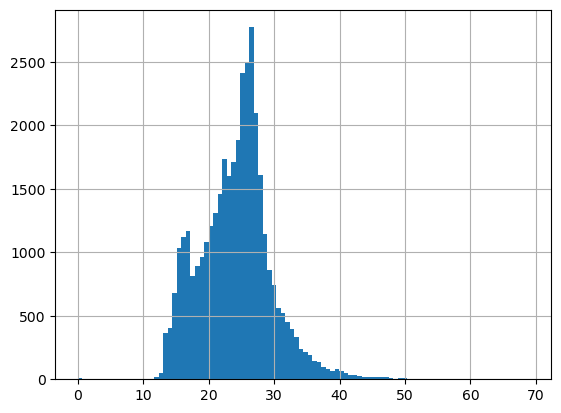

In [8]:
data.test_res_imc_1.hist(bins=100)

<Axes: >

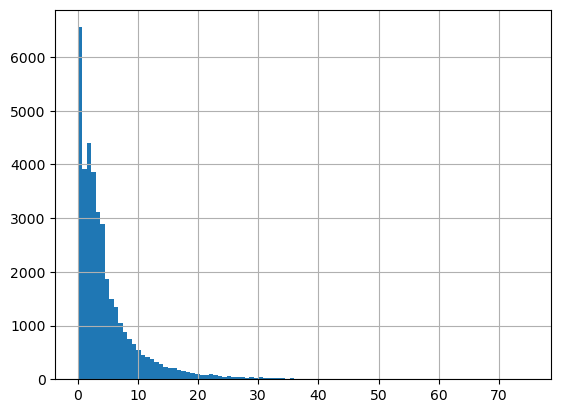

In [9]:
data.test_res_gma_1.hist(bins=100)

<Axes: >

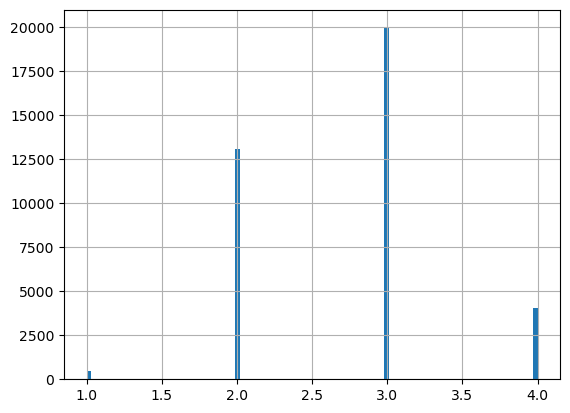

In [10]:
data.test_res_sociostat_1.hist(bins=100)

In [11]:
###### CAMBIAR FORMATO DE LOS DATOS (PIVOT) 

In [12]:
for i in range(1,4):
  print(i)
  data.rename({'VACUNA_{}_DATA'.format(i): 'VACUNA_DATA_{}'.format(i)}, axis=1, inplace=True)
  data.rename({'VACUNA_{}_MOTIU'.format(i): 'VACUNA_MOTIU_{}'.format(i)}, axis=1, inplace=True)
  data.rename({'VACUNA_{}_DATA_pp'.format(i): 'VACUNA_DATA_pp_{}'.format(i)}, axis=1, inplace=True)

1
2
3


In [13]:
stubnames = ['VACUNA_DATA_1', 'VACUNA_MOTIU_1', 'VACUNA_DATA_2',
'VACUNA_MOTIU_2', 'VACUNA_DATA_3', 'VACUNA_MOTIU_3', 'VACUNA_DATA_pp_1',
'VACUNA_DATA_pp_2', 'VACUNA_DATA_pp_3', 
'test_date_covid_1', 'test_res_covid_1',
'test_date_covid_2', 'test_res_covid_2', 'test_date_covid_3',
'test_res_covid_3', 'test_date_imc_1', 'test_res_imc_1',
'test_date_imc_2', 'test_res_imc_2', 'test_date_imc_3',
'test_res_imc_3', 'test_date_sp_1', 'test_res_sp_1', 'test_date_sp_2',
'test_res_sp_2', 'test_date_sp_3', 'test_res_sp_3', 'test_date_dp_1',
'test_res_dp_1', 'test_date_dp_2', 'test_res_dp_2', 'test_date_dp_3',
'test_res_dp_3', 'test_date_abdo_1', 'test_res_abdo_1',
'test_date_abdo_2', 'test_res_abdo_2', 'test_date_abdo_3',
'test_res_abdo_3', 'test_date_bg_1', 'test_res_bg_1', 'test_date_bg_2',
'test_res_bg_2', 'test_date_bg_3', 'test_res_bg_3', 'test_date_chol_1',
'test_res_chol_1', 'test_date_chol_2', 'test_res_chol_2',
'test_date_chol_3', 'test_res_chol_3', 'test_date_smoking_1',
'test_res_smoking_1', 'test_date_smoking_2', 'test_res_smoking_2',
'test_date_smoking_3', 'test_res_smoking_3', 'test_date_gma_1',
'test_res_gma_1', 'test_date_gma_2', 'test_res_gma_2',
'test_date_gma_3', 'test_res_gma_3', 'test_date_sociostat_1',
'test_res_sociostat_1', 'test_date_sociostat_2', 'test_res_sociostat_2',
'test_date_sociostat_3', 'test_res_sociostat_3', 'Vacuna_1', 'Vacuna_2', 'Vacuna_3']

In [14]:
for i in range(0,len(stubnames)):
  stubnames[i] = stubnames[i][0:-1]

In [15]:
data_piv = pd.wide_to_long(data, list(set(stubnames)), i='NIA', j='time')
data_piv.reset_index(inplace=True, drop=False)

In [16]:
data_piv.time = data_piv.time - 1

In [17]:
# Transform outcome for binary eof

In [18]:
data_piv.loc[(data_piv.time==1)|(data_piv.time==2), 'DM'] = np.NaN

In [19]:
data_piv_final = data_piv[['NIA','test_res_covid_', 'test_res_gma_', 'test_res_sociostat_', 'Vacuna_', 'DM', 'sexe', 'pais_c', 'time']].copy()

In [20]:
# G-formula

In [21]:
time_name = 'time'
id = 'NIA'
time_points = np.max(np.unique(data_piv[time_name])) + 1

In [24]:
# BAseline
covnames = ['test_res_covid_', # binary (int)
            'test_res_gma_', # cont (float)
            'test_res_sociostat_', # categorical ordinal (int)
            'Vacuna_']

covtypes = ['binary',
            'truncated normal',
            'categorical',
            'binary']

trunc_params = ['NA', [0, 'left'], 'NA', 'NA']

covmodels = ['test_res_covid_ ~ lag1_test_res_covid_ + lag2_test_res_covid_ + time',
             'test_res_gma_ ~ lag1_test_res_gma_ + lag2_test_res_gma_ + time',
             'test_res_sociostat_ ~ C(lag1_test_res_sociostat_) + C(lag2_test_res_sociostat_) + time',
             'Vacuna_ ~ lag1_Vacuna_ + lag2_Vacuna_ + time']

basecovs = ['pais_c', 'sexe'] 

outcome_name = 'DM'
ymodel = 'DM ~ sexe + C(pais_c) + test_res_covid_ + lag1_test_res_covid_ + lag2_test_res_covid_ + test_res_gma_ + lag1_test_res_gma_ + lag2_test_res_gma_\
              + C(test_res_sociostat_) + C(lag1_test_res_sociostat_) + C(lag2_test_res_sociostat_) + Vacuna_ + lag1_Vacuna_ + lag2_Vacuna_ + time'
 
outcome_type = 'binary_eof'
int_descript = ['Never treat', 'Treat on Vacuna only at t1', 'Treat on Vacuna only at t1 & t2', 'Treat on Vacuna at t1, t2 & t3']
#ymodel_type = 'Random_forest'

Intervention1_Vacuna_ = [static, np.zeros(time_points), [0, 1, 2]]
Intervention2_Vacuna_ = [static, np.ones(time_points), [0]]
Intervention3_Vacuna_ = [static, np.ones(time_points), [0, 1]]
Intervention4_Vacuna_ = [static, np.ones(time_points), [0, 1, 2]]

In [25]:
#%%capture cap
#%%time

g1 = ParametricGformula(obs_data = data_piv_final, id = id, time_name=time_name,
             time_points = time_points, int_descript = int_descript,
             covnames=covnames, covtypes=covtypes, trunc_params=trunc_params,
             covmodels=covmodels, basecovs=basecovs,
             outcome_name=outcome_name, ymodel=ymodel, outcome_type=outcome_type,
             Intervention1_Vacuna_ = Intervention1_Vacuna_,
             Intervention2_Vacuna_ = Intervention2_Vacuna_,
             Intervention3_Vacuna_ = Intervention3_Vacuna_,
             Intervention4_Vacuna_ = Intervention4_Vacuna_,
             nsamples=0, parallel=True, ncores=30)

g1.fit()

print('********************************************************************')

start fitting parametric model.
Optimization terminated successfully.
         Current function value: 0.101559
         Iterations 13
start simulating.
+---------------------------------+---------+----------------------------------+----------------+---------------------+
|           Intervention          | NP mean | g-formula mean (NICE-parametric) | Mean Ratio(MR) | Mean Difference(MD) |
+---------------------------------+---------+----------------------------------+----------------+---------------------+
|       Natural course(ref)       |   nan   |             0.02285              |    1.00000     |       0.00000       |
|           Never treat           |    NA   |             0.02278              |    0.99697     |       -0.00007      |
|    Treat on Vacuna only at t1   |    NA   |             0.02280              |    0.99787     |       -0.00005      |
| Treat on Vacuna only at t1 & t2 |    NA   |             0.02271              |    0.99381     |       -0.00014      |
|  Trea

In [32]:
# Save the captured output to a text file
with open('output.txt', 'a') as file:
    file.write(cap.stdout)

In [23]:
g1

In [24]:
# Without 2nd lags
covnames = ['test_res_covid_', # binary (int)
            'test_res_gma_', # cont (float)
            'test_res_sociostat_', # categorical ordinal (int)
            'Vacuna_']

covtypes = ['binary',
            'truncated normal',
            'categorical',
            'binary']

trunc_params = ['NA', [0, 'left'], 'NA', 'NA']

covmodels = ['test_res_covid_ ~ lag1_test_res_covid_  + time',
             'test_res_gma_ ~ lag1_test_res_gma_  + time',
             'test_res_sociostat_ ~ C(lag1_test_res_sociostat_)  + time',
             'Vacuna_ ~ lag1_Vacuna_ + lag2_Vacuna_ +  time']

basecovs = ['pais_c', 'sexe'] 

outcome_name = 'DM'
ymodel = 'DM ~ sexe + C(pais_c) + test_res_covid_ + lag1_test_res_covid_ +  test_res_gma_ + lag1_test_res_gma_ + \
              + C(test_res_sociostat_) + C(lag1_test_res_sociostat_)  + Vacuna_ + lag1_Vacuna_ + lag2_Vacuna_  + time'
 
outcome_type = 'binary_eof'
int_descript = ['Never treat', 'Treat on Vacuna only at t1', 'Treat on Vacuna only at t1 & t2', 'Treat on Vacuna at t1, t2 & t3']
ymodel_type = 'Random_forest'

Intervention1_A = [static, np.zeros(time_points)]
Intervention2_A = [static, np.ones(time_points), [0]]
Intervention3_A = [static, np.ones(time_points), [0, 1]]
Intervention4_A = [static, np.ones(time_points), [0, 1, 2]]

In [25]:
%%capture cap
%%time

g2 = ParametricGformula(obs_data = data_piv_final, id = id, time_name=time_name,
             time_points = time_points, int_descript = int_descript,
             covnames=covnames, covtypes=covtypes, trunc_params=trunc_params,
             covmodels=covmodels, basecovs=basecovs,
             outcome_name=outcome_name, ymodel=ymodel, outcome_type=outcome_type,
             Intervention1_A = Intervention1_A,
             Intervention2_A = Intervention2_A,
             Intervention3_A = Intervention3_A,
             Intervention4_A = Intervention4_A,
             nsamples=20, parallel=True, ncores=20)

g2.fit()

print('********************************************************************')

KeyboardInterrupt: 

In [26]:
# Save the captured output to a text file
with open('output.txt', 'a') as file:
    file.write(cap.stdout)

In [27]:
g2

In [28]:
# With only 2 interventions
covnames = ['test_res_covid_', # binary (int)
            'test_res_gma_', # cont (float)
            'test_res_sociostat_', # categorical ordinal (int)
            'Vacuna_']

covtypes = ['binary',
            'truncated normal',
            'categorical',
            'binary']

trunc_params = ['NA', [0, 'left'], 'NA', 'NA']

covmodels = ['test_res_covid_ ~ lag1_test_res_covid_  + time',
             'test_res_gma_ ~ lag1_test_res_gma_  + time',
             'test_res_sociostat_ ~ C(lag1_test_res_sociostat_)  + time',
             'Vacuna_ ~ lag1_Vacuna_ +  time']

basecovs = ['pais_c', 'sexe'] 

outcome_name = 'DM'
ymodel = 'DM ~ sexe + C(pais_c) + test_res_covid_ + lag1_test_res_covid_ +  test_res_gma_ + lag1_test_res_gma_ + \
              + C(test_res_sociostat_) + C(lag1_test_res_sociostat_)  + Vacuna_ + lag1_Vacuna_  + time'
 
outcome_type = 'binary_eof'
int_descript = ['Never treat', 'Always treat']
ymodel_type = 'Random_forest'

Intervention1_A = [static, np.zeros(time_points)]
Intervention2_A = [static, np.ones(time_points), [0, 1, 2]]

In [29]:
%%capture cap
%%time

g3 = ParametricGformula(obs_data = data_piv_final, id = id, time_name=time_name,
             time_points = time_points, int_descript = int_descript,
             covnames=covnames, covtypes=covtypes, trunc_params=trunc_params,
             covmodels=covmodels, basecovs=basecovs,
             outcome_name=outcome_name, ymodel=ymodel, outcome_type=outcome_type,
             Intervention1_A = Intervention1_A,
             Intervention2_A = Intervention2_A,
             nsamples=20, parallel=True, ncores=20)

g3.fit()

print('********************************************************************')

KeyboardInterrupt: 

In [30]:
# Save the captured output to a text file
with open('output.txt', 'a') as file:
    file.write(cap.stdout)

In [31]:
g3

### Notes:
- Time has to start at 0, otherwise we get errors of type "operands of shape () could not be broadcast together"
- No NaNs in the covariates, otherwise we get errors of type "operands of shape () could not be broadcast together"

In [ ]:
### Investigate other intervention options (grace period etc.)

In [ ]:
### Investigate possibility of using ML model

In [2]:
import pickle

In [6]:
# Deserialize the object from the binary file
with open('gformRF.pkl', 'rb') as file:
    g = pickle.load(file)

EOFError: Ran out of input